In [1]:
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

from fringes import fringe_wrapper
from phase import phase_wrapper
from config import config

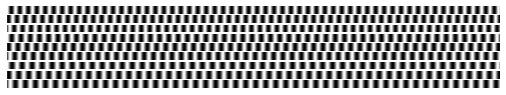

In [2]:
#- Generate 3-frequence 3-step fringe images with gamma=1.3
# config
cfg1 = config()
cfg1.debug = False
cfg1.pattern_size = (1920, 30)

# cfg.Tp = [14, 15, 16]   # Combined period 1680.0   *** for paper ***
cfg1.Tp = [33, 36, 39]   # Combined period 2574  *** for paper ***

# Note that, we must update Tc and alpha for correct phase extraction
cfg1.Tc = cfg1.Tp # Tc is for camera recordings
cfg1.alpha = [1, cfg1.Tp[0]/cfg1.Tp[1], cfg1.Tp[0]/cfg1.Tp[2]]

cfg1.gamma = 1.3
fringe_images1=fringe_wrapper(cfg1, "gamma").generate_all()

plt.figure(figsize=(16,1.5))
for i in range(3):
    for j in range(3):
        plt.subplot(9,1,i*3+j+1)
        plt.imshow(fringe_images1[i][j],cmap="gray")
        plt.axis("off")
plt.show()

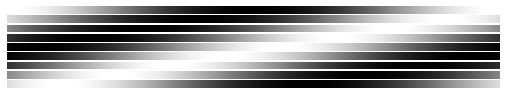

In [3]:
#- Generate 9-step fringe images with gamma=1.3
# config
cfg2 = config()
cfg2.debug = False
cfg2.pattern_size = (1920, 30)

# cfg.Tp = [14, 15, 16]   # Combined period 1680.0   *** for paper ***
cfg2.Tp = [1920, 36, 39]   # Combined period 2574  *** for paper ***

# Note that, we must update Tc and alpha for correct phase extraction
cfg2.Tc = cfg2.Tp # Tc is for camera recordings
cfg2.alpha = [1, cfg2.Tp[0]/cfg2.Tp[1], cfg2.Tp[0]/cfg2.Tp[2]]
cfg2.steps = [9,3,3]

cfg2.gamma = 1.3
fringe_images2=fringe_wrapper(cfg2, "gamma").generate_all()[0]

plt.figure(figsize=(16,1.5))
for i in range(9):
    plt.subplot(9,1,i+1)
    plt.imshow(fringe_images2[i],cmap="gray")
    plt.axis("off")
plt.show()

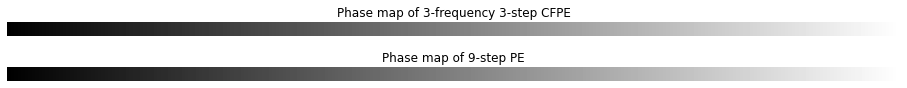

In [4]:
cfpe = phase_wrapper(cfg1, "CFPE")
pe = phase_wrapper(cfg2, "PE")

phase1, T1 = cfpe.phase_extract(fringe_images1)
phase2 = pe.psi_extract(fringe_images2)

plt.figure(figsize=(16,1.5))
plt.subplot(2,1,1)
plt.imshow(np.float64(phase1),cmap="gray")
plt.axis("off")
plt.title("Phase map of 3-frequency 3-step CFPE")
plt.subplot(2,1,2)
plt.imshow(np.float64(phase2),cmap="gray")
plt.axis("off")
plt.title("Phase map of 9-step PE")
plt.show()

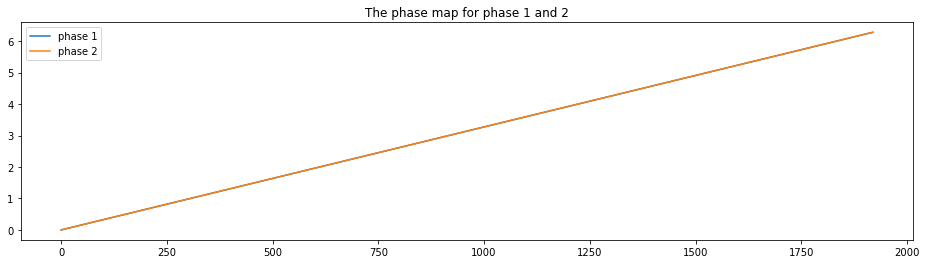

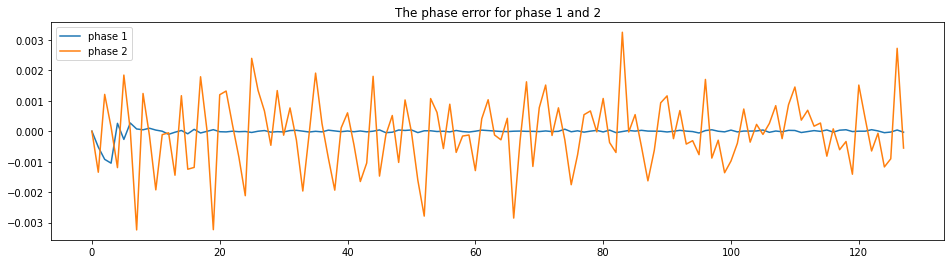

In [21]:
plt.figure(figsize=(16,4))
plt.plot(phase1[10,:]*33/1920, label="phase 1")
plt.plot(phase2[10,:], label="phase 2")
plt.legend()
plt.title("The phase map for phase 1 and 2")

Truth = np.array(range(1920))*2*np.pi/1920
err1 = phase1[10,:]*33/1920-Truth
err2 = phase2[10,:]-Truth
plt.figure(figsize=(16,4))
plt.plot(err1[:128], label="phase 1")
plt.plot(err2[:128], label="phase 2")
plt.legend()
plt.title("The phase error for phase 1 and 2")
plt.show()